In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# from collections import defaultdict
# from shapely.geometry import Point, Polygon

# Init NuScenes. Requires the dataset to be stored on disk.
from nuscenes.nuscenes import NuScenes
from nuscenes.map_expansion.map_api import NuScenesMap

In [2]:
# LOADING the necessary files
with open('../details/scene_info.pkl', 'rb') as handle:
    scene_info = pickle.load(handle)
    
with open('../details/pedestrian_details.pkl', 'rb') as handle:
    pedestrian_details = pickle.load(handle)
    
with open('../details/new_ped_details.pkl', 'rb') as handle:
    new_ped_details = pickle.load(handle)

In [3]:
person_token = list(new_ped_details.keys())
pedestrian_details[person_token[0]].keys()

dict_keys(['translation', 'rotation', 'velocity', 'ego_translation', 'ego_rotation', 'ego_time', 'd_curb', 'height', 'group', 'scene_no', 'map_name', 'acceleration_x', 'acceleration_y', 'del_time'])

In [4]:
# extracting trajectories in a dict with new key values
ped_counter = 0
ped_dataset = dict()

for p, val in new_ped_details.items():
    # don't consider personal mobility they are bicycles
    if val["group"] == "personal_mobility":
        continue
    if len(val["translation"]) < 24:
        # just take first 16 positions
        ped_dataset[ped_counter] = {
            "translation": val["translation"][:16],
            "rotation": val["rotation"][:16],
            "velocity": val["velocity"][:16],
            "ego_translation": val["ego_translation"][:16],
            "ego_rotation": val["ego_rotation"][:16],
            "ego_time": val["ego_time"][:16],
            "height": val["height"][:16],
            "acceleration_x": val["acceleration_x"][:16],
            "acceleration_y": val["acceleration_y"][:16],
            "del_time": val["del_time"][:16],
            "d_curb": val["d_curb"][:16],
            "group": val["group"],
            "scene_no": val["scene_no"],
            "map_name": val["map_name"]
        }
        ped_counter += 1       
        
    elif len(val["translation"]) < 32:
        # take first 16 values 
        ped_dataset[ped_counter] = {
            "translation": val["translation"][:16],
            "rotation": val["rotation"][:16],
            "velocity": val["velocity"][:16],
            "ego_translation": val["ego_translation"][:16],
            "ego_rotation": val["ego_rotation"][:16],
            "ego_time": val["ego_time"][:16],
            "height": val["height"][:16],
            "acceleration_x": val["acceleration_x"][:16],
            "acceleration_y": val["acceleration_y"][:16],
            "del_time": val["del_time"][:16],
            "d_curb": val["d_curb"][:16],
            "group": val["group"],
            "scene_no": val["scene_no"],
            "map_name": val["map_name"]
        }
        ped_counter += 1
        
        # take last 16 values
        ped_dataset[ped_counter] = {
            "translation": val["translation"][-16:],
            "rotation": val["rotation"][-16:],
            "velocity": val["velocity"][-16:],
            "ego_translation": val["ego_translation"][-16:],
            "ego_rotation": val["ego_rotation"][-16:],
            "ego_time": val["ego_time"][-16:],
            "height": val["height"][-16:],
            "acceleration_x": val["acceleration_x"][-16:],
            "acceleration_y": val["acceleration_y"][-16:],
            "del_time": val["del_time"][-16:],
            "d_curb": val["d_curb"][-16:],
            "group": val["group"],
            "scene_no": val["scene_no"],
            "map_name": val["map_name"]
        }
        ped_counter += 1
        
    elif len(val["translation"]) <= 40:
        # take first 16 values 
        ped_dataset[ped_counter] = {
            "translation": val["translation"][:16],
            "rotation": val["rotation"][:16],
            "velocity": val["velocity"][:16],
            "ego_translation": val["ego_translation"][:16],
            "ego_rotation": val["ego_rotation"][:16],
            "ego_time": val["ego_time"][:16],
            "height": val["height"][:16],
            "acceleration_x": val["acceleration_x"][:16],
            "acceleration_y": val["acceleration_y"][:16],
            "del_time": val["del_time"][:16],
            "d_curb": val["d_curb"][:16],
            "group": val["group"],
            "scene_no": val["scene_no"],
            "map_name": val["map_name"]
        }
        ped_counter += 1
        
        #take second middle part of path
        ped_dataset[ped_counter] = {
            "translation": val["translation"][8:24],
            "rotation": val["rotation"][8:24],
            "velocity": val["velocity"][8:24],
            "ego_translation": val["ego_translation"][8:24],
            "ego_rotation": val["ego_rotation"][8:24],
            "ego_time": val["ego_time"][8:24],
            "height": val["height"][8:24],
            "acceleration_x": val["acceleration_x"][8:24],
            "acceleration_y": val["acceleration_y"][8:24],
            "del_time": val["del_time"][8:24],
            "d_curb": val["d_curb"][8:24],
            "group": val["group"],
            "scene_no": val["scene_no"],
            "map_name": val["map_name"]
        }
        ped_counter += 1
        
        #take thrid middle part of path
        ped_dataset[ped_counter] = {
            "translation": val["translation"][16:32],
            "rotation": val["rotation"][16:32],
            "velocity": val["velocity"][16:32],
            "ego_translation": val["ego_translation"][16:32],
            "ego_rotation": val["ego_rotation"][16:32],
            "ego_time": val["ego_time"][16:32],
            "height": val["height"][16:32],
            "acceleration_x": val["acceleration_x"][16:32],
            "acceleration_y": val["acceleration_y"][16:32],
            "del_time": val["del_time"][16:32],
            "d_curb": val["d_curb"][16:32],
            "group": val["group"],
            "scene_no": val["scene_no"],
            "map_name": val["map_name"]
        }
        ped_counter += 1
        
        # take last 16 values
        ped_dataset[ped_counter] = {
            "translation": val["translation"][-16:],
            "rotation": val["rotation"][-16:],
            "velocity": val["velocity"][-16:],
            "ego_translation": val["ego_translation"][-16:],
            "ego_rotation": val["ego_rotation"][-16:],
            "ego_time": val["ego_time"][-16:],
            "height": val["height"][-16:],
            "acceleration_x": val["acceleration_x"][-16:],
            "acceleration_y": val["acceleration_y"][-16:],
            "del_time": val["del_time"][-16:],
            "d_curb": val["d_curb"][-16:],
            "group": val["group"],
            "scene_no": val["scene_no"],
            "map_name": val["map_name"]
        }
        ped_counter += 1

In [5]:
# helper functions for orientation

def move_to_origin(l, origin=None):
    if origin:
        x0, y0 = origin
        return [[x - x0, y - y0] for x, y in l]
    else:
        x0, y0 = l[0]
        return (x0, y0), [[x - x0, y - y0] for x, y in l]

def rotate_to_y_axis(l, theta=None):
    if theta or theta==0.0:
        return [(x*np.cos(theta) - y*np.sin(theta), 
                 x*np.sin(theta) + y*np.cos(theta)) for x, y in l]
    else:
        xn, yn = l[-1]
        theta = np.arctan2(-yn, xn) + (np.pi / 2.0)
        return theta, [(x*np.cos(theta) - y*np.sin(theta), 
                    x*np.sin(theta) + y*np.cos(theta)) for x, y in l]

In [6]:
# adding normalized trajectories along with angle and origin in ped_dataset dict
for p, val in ped_dataset.items():
    origin, new_2d = move_to_origin(np.array(val["translation"])[:,:2])
    angle, new_2d = rotate_to_y_axis(new_2d)
    
    val["origin"] = origin
    val["angle"] = angle
    val["translation_2d"] = new_2d

In [7]:
# calculating new velocities and accleration after rotation
# and saving it into velocity_2d and acceleration_2d
for p, val in ped_dataset.items():
    translation_difference = np.diff(np.array(val["translation_2d"]), axis=0)
    time_difference = 1e-6 * np.diff(np.array(val["ego_time"]))
    
    cur_velocity = translation_difference / time_difference[:,None]
    cur_velocity = np.append(cur_velocity, 
                             cur_velocity[-1][np.newaxis], 
                             axis=0)

    velocity_difference = np.diff(cur_velocity, axis=0)
    cur_acceleration = velocity_difference / time_difference[:,None]
    cur_acceleration[-1] = cur_acceleration[-2]
    cur_acceleration = np.append(cur_acceleration, 
                                 cur_acceleration[-1][np.newaxis], 
                                 axis=0)
    val["velocity_2d"] = cur_velocity
    val["acceleration_2d"] = cur_acceleration

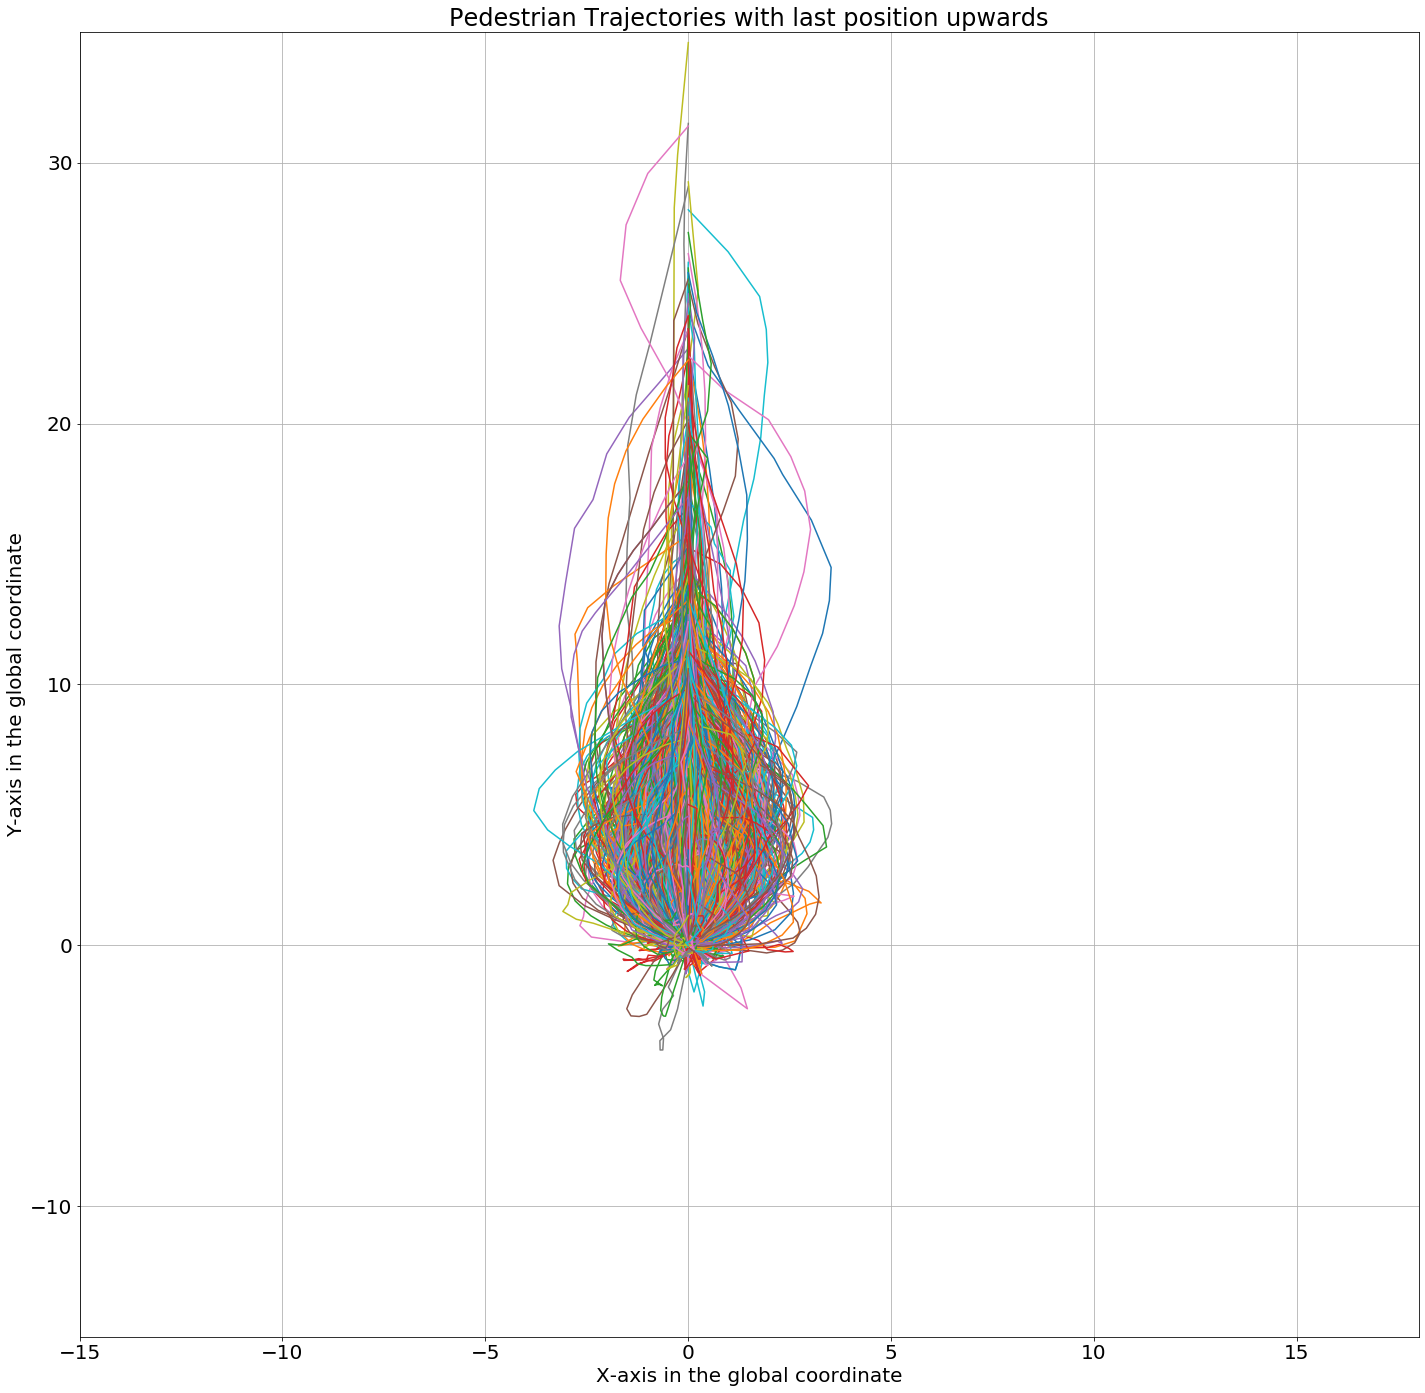

In [8]:
plt.figure(figsize=(24,24))
plt.rcParams.update({'font.size': 20})

for k,j in ped_dataset.items():
    assert len(j["translation_2d"]) == 16
    plt.plot(*zip(*j["translation_2d"]))

plt.xlabel("X-axis in the global coordinate")
plt.ylabel("Y-axis in the global coordinate")
plt.xlim(-15, 18)
plt.ylim(-15, 35)
plt.grid()
plt.title("Pedestrian Trajectories with last position upwards")
plt.savefig("../images/origin_trajectories_last.png", bbox_inches='tight', pad_inches=1)    
plt.show()

In [9]:
with open('../details/ped_dataset.pkl', 'wb') as handle:
    pickle.dump(ped_dataset, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Creating dataset array with only pedestrians

In [34]:
# creating the numpy matrix with pedestrian features

total_ped_matrix = np.empty((0, 16, 7))

for i in range(len(ped_dataset)):
    cur_person = np.zeros((16,7))
    cur_person[:,0] = np.array(ped_dataset[i]["translation_2d"])[:,0]
    cur_person[:,1] = np.array(ped_dataset[i]["translation_2d"])[:,1]
    cur_person[:,2] = np.array(ped_dataset[i]["velocity"])[:,0]
    cur_person[:,3] = np.array(ped_dataset[i]["velocity"])[:,1]
    cur_person[:,4] = np.array(ped_dataset[i]["acceleration_x"])
    cur_person[:,5] = np.array(ped_dataset[i]["acceleration_y"])
    cur_person[:,6] = np.array(ped_dataset[i]["d_curb"])
    
    total_ped_matrix = np.append(total_ped_matrix, 
                                cur_person[np.newaxis], axis=0)


In [10]:
# creating new numpy matrix with new vel and acc features

new_ped_matrix = np.empty((0, 16, 7))

for i in range(len(ped_dataset)):
    cur_person = np.zeros((16,7))
    cur_person[:,0] = np.array(ped_dataset[i]["translation_2d"])[:,0]
    cur_person[:,1] = np.array(ped_dataset[i]["translation_2d"])[:,1]
    cur_person[:,2] = np.array(ped_dataset[i]["velocity_2d"])[:,0]
    cur_person[:,3] = np.array(ped_dataset[i]["velocity_2d"])[:,1]
    cur_person[:,4] = np.array(ped_dataset[i]["acceleration_2d"][:,0])
    cur_person[:,5] = np.array(ped_dataset[i]["acceleration_2d"][:,1])
    cur_person[:,6] = np.array(ped_dataset[i]["d_curb"])
    
    new_ped_matrix = np.append(new_ped_matrix, 
                                cur_person[np.newaxis], axis=0)

In [12]:
np.save("../details/new_ped_matrix.npy", new_ped_matrix)

# Adding ego-vehicle to dataset array

In [10]:
with open('../details/ped_dataset.pkl', 'rb') as handle:
    ped_dataset = pickle.load(handle)

In [11]:
for p, val in ped_dataset.items():
    cur_origin = val["origin"]
    cur_angle = val["angle"]

    # rotating and moving the trajectories according to 
    # pedestrian orientation
    cur_translation = np.array(val["ego_translation"])[:,:2]
    moved_translation = move_to_origin(cur_translation, cur_origin)
    rot_translation = rotate_to_y_axis(moved_translation, cur_angle)
    val["egot_2d"] = rot_translation

    #calculating new velocities and acceleration
    translation_difference = np.diff(np.array(rot_translation), axis=0)
    time_difference = 1e-6 * np.diff(np.array(val["ego_time"]))

    cur_velocity = translation_difference / time_difference[:,None]
    cur_velocity = np.append(cur_velocity, 
                             cur_velocity[-1][np.newaxis], 
                             axis=0)

    velocity_difference = np.diff(cur_velocity, axis=0)
    cur_acceleration = velocity_difference / time_difference[:,None]
    cur_acceleration[-1] = cur_acceleration[-2]
    cur_acceleration = np.append(cur_acceleration, 
                                 cur_acceleration[-1][np.newaxis], 
                                 axis=0)

    val["egov_2d"] = cur_velocity
    val["egoa_2d"] = cur_acceleration

In [12]:
with open('../details/ped_dataset.pkl', 'wb') as handle:
    pickle.dump(ped_dataset, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# creating new numpy matrix with new ped and ego vehicle features

ego_ped_matrix = np.empty((0, 2, 16, 7))

for i in range(len(ped_dataset)):
    cur_person = np.zeros((2,16,7))
    cur_person[0,:,0] = np.array(ped_dataset[i]["translation_2d"])[:,0]
    cur_person[0,:,1] = np.array(ped_dataset[i]["translation_2d"])[:,1]
    cur_person[0,:,2] = np.array(ped_dataset[i]["velocity_2d"])[:,0]
    cur_person[0,:,3] = np.array(ped_dataset[i]["velocity_2d"])[:,1]
    cur_person[0,:,4] = np.array(ped_dataset[i]["acceleration_2d"][:,0])
    cur_person[0,:,5] = np.array(ped_dataset[i]["acceleration_2d"][:,1])
    cur_person[0,:,6] = np.array(ped_dataset[i]["d_curb"])
    
    cur_person[1,:,0] = np.array(ped_dataset[i]["egot_2d"])[:,0]
    cur_person[1,:,1] = np.array(ped_dataset[i]["egot_2d"])[:,1]
    cur_person[1,:,2] = np.array(ped_dataset[i]["egov_2d"])[:,0]
    cur_person[1,:,3] = np.array(ped_dataset[i]["egov_2d"])[:,1]
    cur_person[1,:,4] = np.array(ped_dataset[i]["egoa_2d"][:,0])
    cur_person[1,:,5] = np.array(ped_dataset[i]["egoa_2d"][:,1])
    cur_person[1,:,6] = 0
    
    ego_ped_matrix = np.append(ego_ped_matrix, 
                                cur_person[np.newaxis], axis=0)

In [22]:
np.save("../details/ego_ped_matrix.npy", ego_ped_matrix)

# Adding semantic layer information

In [3]:
with open('../details/ped_dataset.pkl', 'rb') as handle:
    ped_dataset = pickle.load(handle)

In [4]:
so_map = NuScenesMap(dataroot='../../../../../data/', \
                       map_name='singapore-onenorth')
bs_map = NuScenesMap(dataroot='../../../../../data/', \
                       map_name='boston-seaport')
sh_map = NuScenesMap(dataroot='../../../../../data/', \
                       map_name='singapore-hollandvillage')
sq_map = NuScenesMap(dataroot='../../../../../data/', \
                       map_name='singapore-queenstown')

# dict mapping map name to map file
map_files = {'singapore-onenorth': so_map,
             'boston-seaport': bs_map,
             'singapore-hollandvillage': sh_map,
             'singapore-queenstown': sq_map}

In [ ]:
for idx in range(len(ped_dataset)):
    ped_dataset[idx]["ped_layers"] = [] 
    for j in range(len(ped_dataset[idx]["translation"])):
        n_scene = ped_dataset[idx]["scene_no"]
        cur_layers = map_files[scene_info[str(n_scene)]["map_name"]].layers_on_point(
            np.array(ped_dataset[idx]["translation"])[j,0], 
            np.array(ped_dataset[idx]["translation"])[j,1]
        )
        layers_list = [l for l in cur_layers.keys() if cur_layers[l]]
        ped_dataset[idx]["ped_layers"].append(layers_list)

In [ ]:
with open('../details/ped_dataset.pkl', 'wb') as handle:
    pickle.dump(ped_dataset, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# creating new numpy matrix with ped features and semantic layers
layer_ped_matrix = np.empty((0, 16, 8))

for i in range(len(ped_dataset)):
    cur_person = np.zeros((16,8))
    cur_person[:,0] = np.array(ped_dataset[i]["translation_2d"])[:,0]
    cur_person[:,1] = np.array(ped_dataset[i]["translation_2d"])[:,1]
    cur_person[:,2] = np.array(ped_dataset[i]["velocity_2d"])[:,0]
    cur_person[:,3] = np.array(ped_dataset[i]["velocity_2d"])[:,1]
    cur_person[:,4] = np.array(ped_dataset[i]["acceleration_2d"][:,0])
    cur_person[:,5] = np.array(ped_dataset[i]["acceleration_2d"][:,1])
    cur_person[:,6] = np.array(ped_dataset[i]["d_curb"])
    layer_numbers = []
    for cur_layers in ped_dataset[i]["ped_layers"]:
        if "walkway" in cur_layers:
            layer_numbers.append(0.)
        else:
            layer_numbers.append(1.)
    cur_person[:,7] = np.array(layer_numbers)
    
    layer_ped_matrix = np.append(layer_ped_matrix, 
                                cur_person[np.newaxis], axis=0)